<a href="https://colab.research.google.com/github/Stan-Leigh/password-strength-classifier/blob/main/Password_Strength_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
df = pd.read_csv('/content/drive/My Drive/3.Password Strength Classifier /data.csv', error_bad_lines=False)
df.head()

<ipython-input-6-b12407e68ef6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/My Drive/3.Password Strength Classifier /data.csv', error_bad_lines=False)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
df.strength.unique()

array([1, 2, 0])

In [8]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [9]:
df[df.password.isnull()]

,password,strength
367579,NaN,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

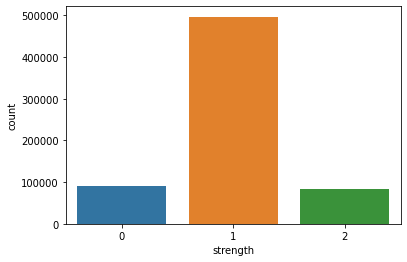

In [15]:
sns.countplot(x=df['strength'])

In [18]:
password_tuple = np.array(df)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [19]:
# shuffle array so that it would be random
random.shuffle(password_tuple)

In [20]:
# divide into dependent and independent data
X = [row[0] for row in password_tuple]
y = [row[1] for row in password_tuple]

In [22]:
def word_divide_char(word):
  characters = []
  for character in word:
    characters.append(character)

  return characters

In [23]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [25]:
tf = TfidfVectorizer(tokenizer=word_divide_char)

In [26]:
vectorizer = tf.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [27]:
vectorizer.shape

(669639, 134)

In [30]:
tf.get_feature_names_out()

array(['\x02', '\x05', '\x08', '\x10', '\x11', '\x12', '\x13', '\x16',
       '\x17', '\x19', '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#',
       '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@',
       '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81',
       '\x8d', '\xa0', '¡', '¨', '«', '°', '±', '²', '³', '´', 'µ', '·',
       'º', '»', '¼', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ',
       'ç', 'è', 'ê', 'í', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷',
       'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', '—', '‚', '…', '‹', '›',
       '™'], dtype=object)

In [31]:
first_document_vector = vectorizer[0]
first_document_vector

<1x134 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [32]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56748118],
        [0.        ],
        [0.59099911],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [35]:
df1 = pd.DataFrame(first_document_vector.T.todense(), index=tf.get_feature_names_out(), columns=['TF-IDF'])
df1.head()

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0


In [38]:
df1.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.590999
5,0.567481
z,0.336046
k,0.292275
d,0.285408
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [40]:
X_train, X_test, y_train, y_test = train_test_split(vectorizer, y, test_size=0.2, random_state=2023)

In [41]:
X_train.shape

(535711, 134)

In [44]:
clf = LogisticRegression(random_state=2023, multi_class='multinomial')

In [45]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=2023)

In [47]:
dt = np.array(['%@123abcd'])

In [48]:
pred = tf.transform(dt)
clf.predict(pred)

array([1])

1 means that this example password is medium strength!

In [52]:
y_pred = clf.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, y_pred) 

In [54]:
cm

array([[ 5427, 12624,    10],
       [ 3830, 93209,  2469],
       [   31,  5061, 11267]])

In [55]:
accuracy_score(y_test, y_pred)

0.8206125679469566

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     18061
           1       0.84      0.94      0.89     99508
           2       0.82      0.69      0.75     16359

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

